In [1]:
!pip install quandl

In [2]:
import quandl
import pandas as pd
import numpy as np
quandl.ApiConfig.api_key = 'X6mZSY79yeySfpCVJaKg'
tesla=quandl.get("WIKI/TSLA") # download tesla data using quandl api from(2015-2018)
gm = quandl.get('WIKI/GM') # download gm data using quandl api from(2015-2018)
ford=quandl.get('WIKI/F') # download ford data using quandl api from(2015-2018)

tesla.reset_index(level=0,inplace=True)
gm.reset_index(level=0,inplace=True)
ford.reset_index(level=0,inplace=True)
tesla=tesla[(tesla['Date'] > '2015-01-01') & (tesla['Date'] < '2019-12-31')]
gm=gm[(gm['Date'] > '2015-01-01') & (gm['Date'] < '2019-12-31')]
ford=ford[(ford['Date'] > '2015-01-01') & (ford['Date'] < '2019-12-31')]


In [3]:
ford

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
10743,2015-01-02,15.59,15.650,15.183,15.36,24773033.0,0.0,1.0,13.267555,13.318617,12.921186,13.071819,24773033.0
10744,2015-01-05,15.12,15.130,14.690,14.76,44079745.0,0.0,1.0,12.867571,12.876082,12.501629,12.561201,44079745.0
10745,2015-01-06,14.88,14.900,14.380,14.62,32974961.0,0.0,1.0,12.663324,12.680345,12.237809,12.442056,32974961.0
10746,2015-01-07,14.78,15.090,14.770,15.04,26060725.0,0.0,1.0,12.578221,12.842040,12.569711,12.799489,26060725.0
10747,2015-01-08,15.40,15.480,15.230,15.42,33867408.0,0.0,1.0,13.105860,13.173942,12.961185,13.122880,33867408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11551,2018-03-21,11.00,11.185,10.930,11.10,38407514.0,0.0,1.0,11.000000,11.185000,10.930000,11.100000,38407514.0
11552,2018-03-22,11.00,11.060,10.730,10.75,50907549.0,0.0,1.0,11.000000,11.060000,10.730000,10.750000,50907549.0
11553,2018-03-23,10.79,10.850,10.510,10.56,39706214.0,0.0,1.0,10.790000,10.850000,10.510000,10.560000,39706214.0
11554,2018-03-26,10.74,10.870,10.680,10.83,52165572.0,0.0,1.0,10.740000,10.870000,10.680000,10.830000,52165572.0


In [4]:
gm.tail()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
1844,2018-03-21,37.16,38.02,37.100,37.58,11412099.0,0.0,1.0,37.16,38.02,37.100,37.58,11412099.0
1845,2018-03-22,37.23,37.33,36.270,36.35,12455805.0,0.0,1.0,37.23,37.33,36.270,36.35,12455805.0
1846,2018-03-23,36.42,36.59,35.130,35.17,12939065.0,0.0,1.0,36.42,36.59,35.130,35.17,12939065.0
1847,2018-03-26,35.94,36.05,35.285,35.99,9251162.0,0.0,1.0,35.94,36.05,35.285,35.99,9251162.0
1848,2018-03-27,36.02,36.03,34.500,34.87,17393191.0,0.0,1.0,36.02,36.03,34.500,34.87,17393191.0


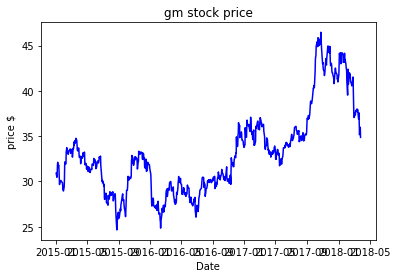

In [5]:
#Current value of gm
import matplotlib.pyplot as plt
plt.plot(gm["Date"],gm['Adj. Close'],"b")
plt.title("gm stock price")
plt.xlabel("Date")
plt.ylabel("price $")
plt.show()



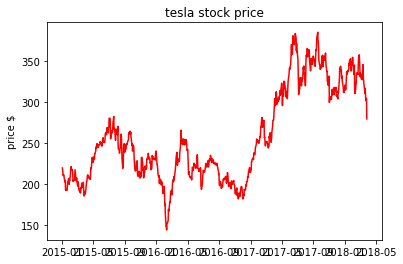

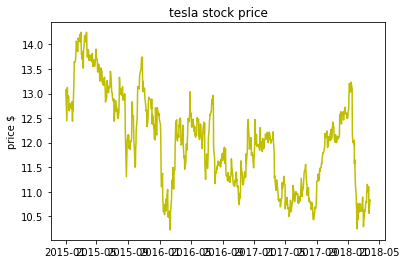

In [6]:
#Current value of tesla
plt.plot(tesla["Date"],tesla['Adj. Close'],"r")
plt.title("tesla stock price")
plt.ylabel("price $")
plt.show()
#Current value of ford
plt.plot(ford["Date"],ford['Adj. Close'],"y")
plt.title("tesla stock price")
plt.ylabel("price $")
plt.show()

In [8]:
#number of stack holders taken from google to caluclate market cap
tesla_shares = {2018: 171, 2017:166 , 2016: 144, 2015: 128}
gm_shares = {2018:1431 , 2017:1492 , 2016: 1570, 2015: 1640}
ford_shares={2018: 3998, 2017:3998 , 2016: 3999, 2015: 4002}

In [9]:
tesla['Year'] = pd.DatetimeIndex(tesla['Date']).year
ford['Year'] = pd.DatetimeIndex(ford['Date']).year
gm['Year'] = pd.DatetimeIndex(gm['Date']).year

In [10]:
gm.dtypes

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close                 float64
Volume                float64
Ex-Dividend           float64
Split Ratio           float64
Adj. Open             float64
Adj. High             float64
Adj. Low              float64
Adj. Close            float64
Adj. Volume           float64
Year                    int64
dtype: object

In [11]:
#caluclating market cap (marketcap=adj.close * number of share holders)
tesla['cap_t']=0
for i,year in enumerate(tesla['Year']):
  t_shares=tesla_shares.get(year)
  tesla['cap_t']=t_shares * tesla['Adj. Close'] 

In [12]:
ford['cap_f']=0
for i,year in enumerate(ford['Year']):
  f_shares=ford_shares.get(year)
  ford['cap_f']=f_shares * ford['Adj. Close'] 

In [13]:
gm['cap_g']=0
for i,year in enumerate(gm['Year']):
  g_shares=gm_shares.get(year)
  gm['cap_g']=g_shares * gm['Adj. Close'] 

In [14]:
stock=gm.merge(tesla,how='inner',on='Date')

In [15]:
stock=stock.merge(ford,how='inner',on='Date')
stock

,Date,Open_x,High_x,Low_x,Close_x,Volume_x,Ex-Dividend_x,Split Ratio_x,Adj. Open_x,Adj. High_x,Adj. Low_x,Adj. Close_x,Adj. Volume_x,Year_x,cap_g,Open_y,High_y,Low_y,Close_y,Volume_y,Ex-Dividend_y,Split Ratio_y,Adj. Open_y,Adj. High_y,Adj. Low_y,Adj. Close_y,Adj. Volume_y,Year_y,cap_t,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Year,cap_f
0,2015-01-02,35.27,35.31,34.410,34.84,9755006.0,0.0,1.0,31.297917,31.333413,30.534770,30.916344,9755006.0,2015,44241.287905,222.87,223.2500,213.2600,219.310,4764443.0,0.0,1.0,222.87,223.2500,213.2600,219.310,4764443.0,2015,37502.010,15.59,15.650,15.183,15.36,24773033.0,0.0,1.0,13.267555,13.318617,12.921186,13.071819,24773033.0,2015,52261.130547
1,2015-01-05,34.98,35.25,34.070,34.33,16223019.0,0.0,1.0,31.040577,31.280170,30.233061,30.463780,16223019.0,2015,43593.668593,214.55,216.5000,207.1626,210.090,5368477.0,0.0,1.0,214.55,216.5000,207.1626,210.090,5368477.0,2015,35925.390,15.12,15.130,14.690,14.76,44079745.0,0.0,1.0,12.867571,12.876082,12.501629,12.561201,44079745.0,2015,50219.680135
2,2015-01-06,34.41,35.22,34.095,34.85,17747533.0,0.0,1.0,30.534770,31.253548,30.255245,30.925218,17747533.0,2015,44253.986323,210.06,214.2000,204.2100,211.280,6261936.0,0.0,1.0,210.06,214.2000,204.2100,211.280,6261936.0,2015,36128.880,14.88,14.900,14.380,14.62,32974961.0,0.0,1.0,12.663324,12.680345,12.237809,12.442056,32974961.0,2015,49743.341705
3,2015-01-07,35.23,35.95,35.040,35.84,19318069.0,0.0,1.0,31.262422,31.901336,31.093820,31.803724,19318069.0,2015,45511.129694,213.35,214.7800,209.7800,210.950,2968390.0,0.0,1.0,213.35,214.7800,209.7800,210.950,2968390.0,2015,36072.450,14.78,15.090,14.770,15.04,26060725.0,0.0,1.0,12.578221,12.842040,12.569711,12.799489,26060725.0,2015,51172.356994
4,2015-01-08,36.06,36.45,35.800,36.20,15119411.0,0.0,1.0,31.998948,32.345027,31.768229,32.123182,15119411.0,2015,45968.272737,212.81,213.7999,210.0100,210.615,3442509.0,0.0,1.0,212.81,213.7999,210.0100,210.615,3442509.0,2015,36015.165,15.40,15.480,15.230,15.42,33867408.0,0.0,1.0,13.105860,13.173942,12.961185,13.122880,33867408.0,2015,52465.275588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,2018-03-21,37.16,38.02,37.100,37.58,11412099.0,0.0,1.0,37.160000,38.020000,37.100000,37.580000,11412099.0,2018,53776.980000,310.25,322.4400,310.1900,316.530,5927881.0,0.0,1.0,310.25,322.4400,310.1900,316.530,5927881.0,2018,54126.630,11.00,11.185,10.930,11.10,38407514.0,0.0,1.0,11.000000,11.185000,10.930000,11.100000,38407514.0,2018,44377.800000
809,2018-03-22,37.23,37.33,36.270,36.35,12455805.0,0.0,1.0,37.230000,37.330000,36.270000,36.350000,12455805.0,2018,52016.850000,313.89,318.8200,308.1800,309.100,4914307.0,0.0,1.0,313.89,318.8200,308.1800,309.100,4914307.0,2018,52856.100,11.00,11.060,10.730,10.75,50907549.0,0.0,1.0,11.000000,11.060000,10.730000,10.750000,50907549.0,2018,42978.500000
810,2018-03-23,36.42,36.59,35.130,35.17,12939065.0,0.0,1.0,36.420000,36.590000,35.130000,35.170000,12939065.0,2018,50328.270000,311.25,311.6100,300.4500,301.540,6600538.0,0.0,1.0,311.25,311.6100,300.4500,301.540,6600538.0,2018,51563.340,10.79,10.850,10.510,10.56,39706214.0,0.0,1.0,10.790000,10.850000,10.510000,10.560000,39706214.0,2018,42218.880000
811,2018-03-26,35.94,36.05,35.285,35.99,9251162.0,0.0,1.0,35.940000,36.050000,35.285000,35.990000,9251162.0,2018,51501.690000,307.34,307.5900,291.3600,304.180,8324639.0,0.0,1.0,307.34,307.5900,291.3600,304.180,8324639.0,2018,52014.780,10.74,10.870,10.680,10.83,52165572.0,0.0,1.0,10.740000,10.870000,10.680000,10.830000,52165572.0,2018,43298.340000


In [16]:
stock=stock[["Date","cap_g","cap_t","cap_f"]]
stock.head()

,Date,cap_g,cap_t,cap_f
0,2015-01-02,44241.287905,37502.010,52261.130547
1,2015-01-05,43593.668593,35925.390,50219.680135
2,2015-01-06,44253.986323,36128.880,49743.341705
3,2015-01-07,45511.129694,36072.450,51172.356994
4,2015-01-08,45968.272737,36015.165,52465.275588


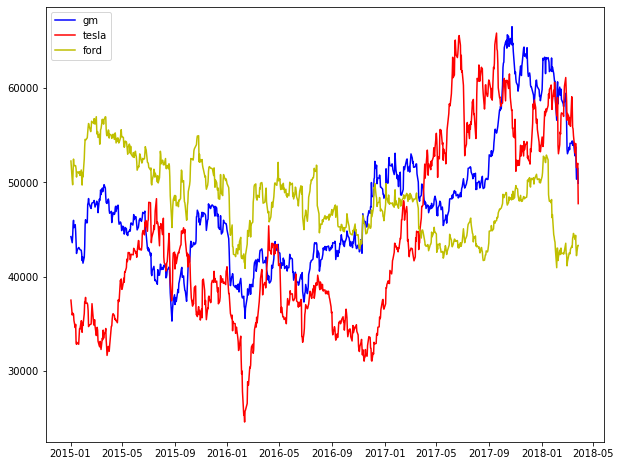

In [17]:
plt.figure(figsize=(10,8))
plt.plot(stock['Date'],stock['cap_g'],'b-',label="gm")
plt.plot(stock['Date'],stock['cap_t'],'r-',label='tesla')
plt.plot(stock['Date'],stock['cap_f'],'y-',label='ford')
plt.legend()
plt.show()

In [18]:
#finding tesla's dominance over gm and ford

first_date = stock.loc[np.min(np.where((stock.cap_t > stock.cap_g) & (stock.cap_t > stock.cap_f) )[0]), 'Date']
last_date = stock.loc[np.max(np.where((stock.cap_t > stock.cap_g) & (stock.cap_t > stock.cap_f))[0]), 'Date']
print("the tesla price was high from {} to  {}".format(first_date.date(),last_date.date()))


the tesla price was high from 2017-04-03 to  2018-03-26


In [19]:
stock_t = (stock['Date'] >= '2017-04-03') & (stock['Date'] <= '2018-03-26')

stock_t=stock.loc[stock_t]


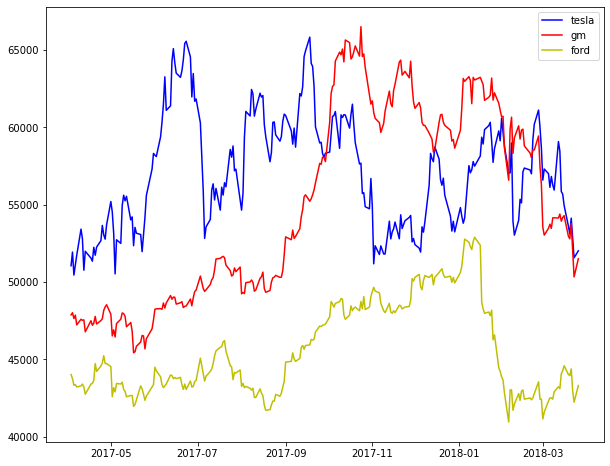

In [20]:
# plotting tesla's market cap dominance over gm and ford (2017-04-03 to 2018-03-26)
plt.figure(figsize=(10,8))
plt.plot(stock_t['Date'],stock_t['cap_t'],'b-',label="tesla")
plt.plot(stock_t['Date'],stock_t['cap_g'],'r-',label='gm')
plt.plot(stock_t['Date'],stock_t['cap_f'],'y-',label='ford')

plt.legend()
plt.show()

In [21]:
#importing facebook's prophet library to forecast the market cap of all three 
import fbprophet
gm=gm.rename(columns={"Date":"ds","cap_g":"y"}) # Prophet takes two values that is ds as date and y as value
tesla=tesla.rename(columns={"Date":"ds","cap_t":"y"})
ford=ford.rename(columns={"Date":"ds","cap_f":"y"})

In [22]:
model_gm = fbprophet.Prophet()
model_gm.fit(gm)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
model_t= fbprophet.Prophet()
model_t.fit(tesla)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
model_f=fbprophet.Prophet()
model_f.fit(ford)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


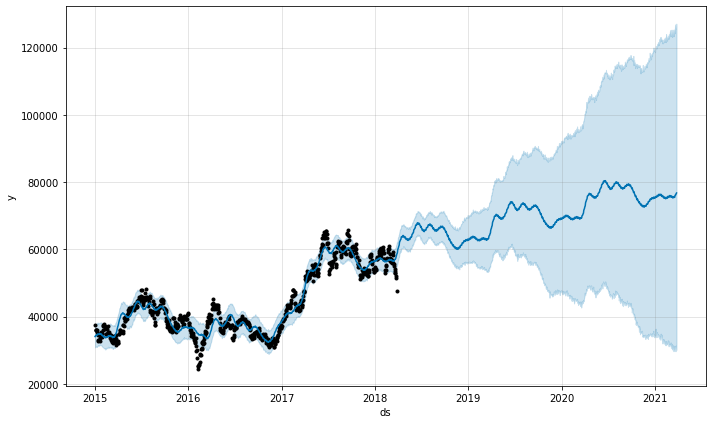

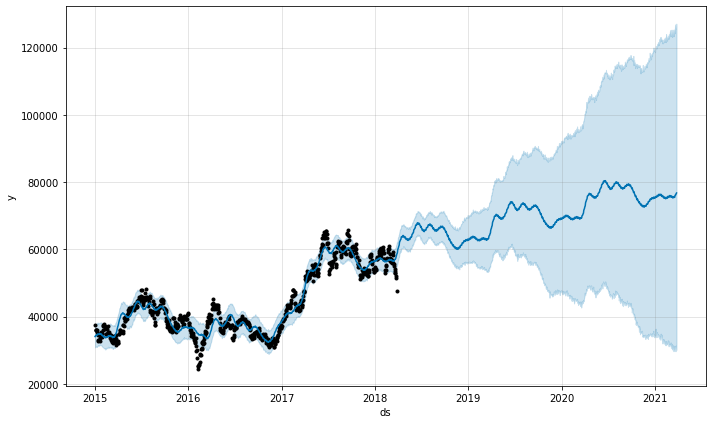

In [25]:
#predicting next three years
future_t = model_t.make_future_dataframe(periods=3*365)
tesla_forecast = model_t.predict(future_t)
model_t.plot(tesla_forecast)

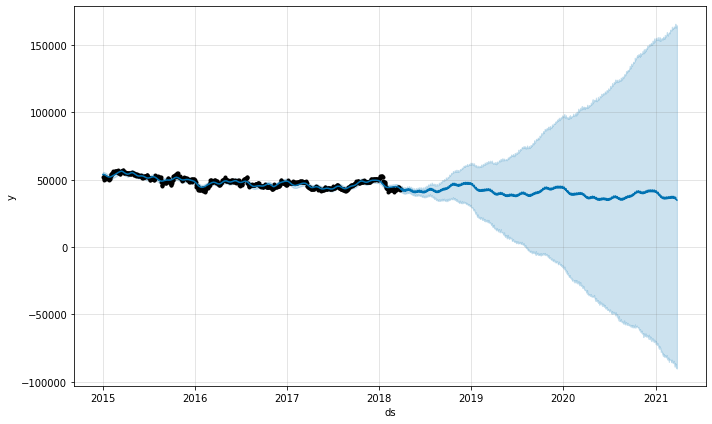

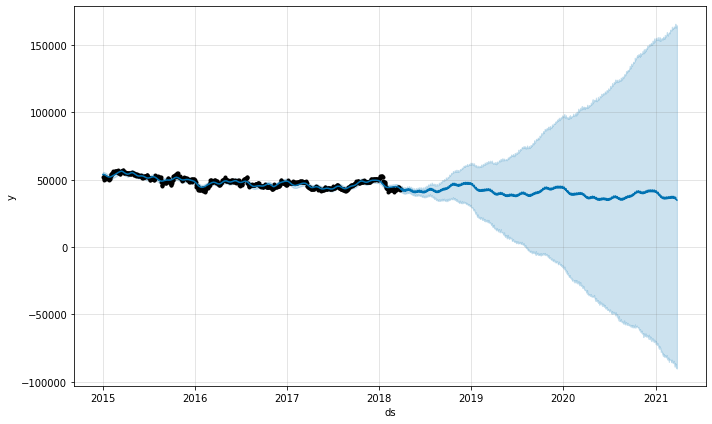

In [26]:
future_f = model_f.make_future_dataframe(periods=3*365)
ford_forecast = model_f.predict(future_f)
model_f.plot(ford_forecast)

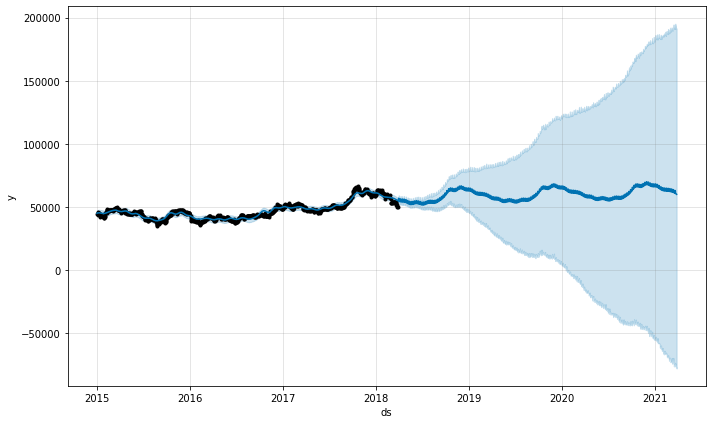

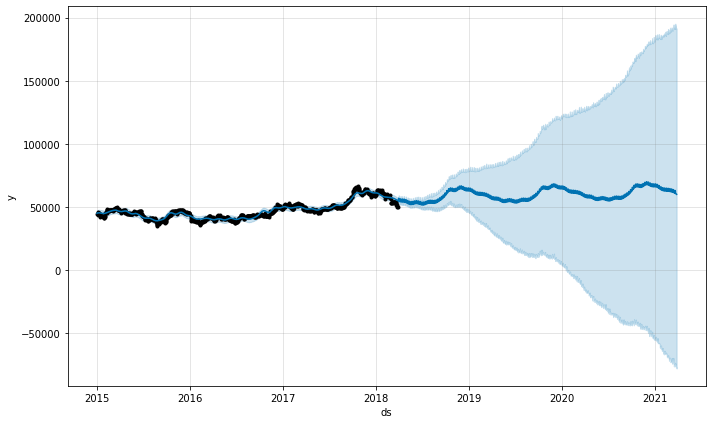

In [27]:
future_gm = model_gm.make_future_dataframe(periods=3*365)
gm_forecast = model_gm.predict(future_gm)
model_gm.plot(gm_forecast)

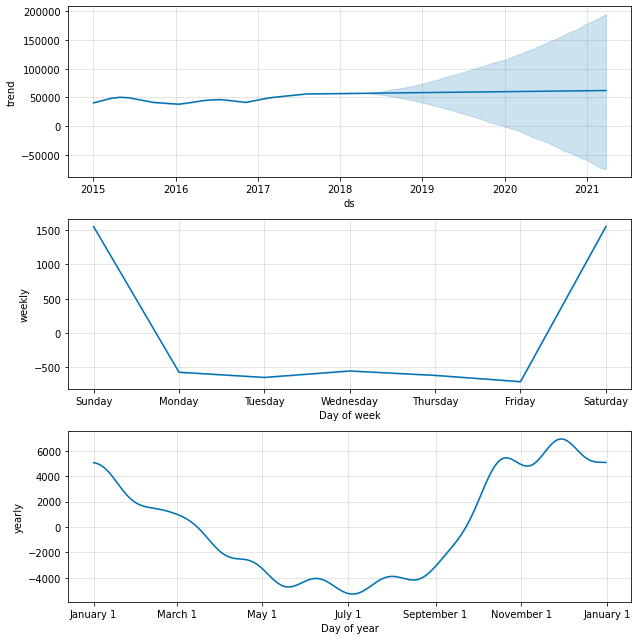

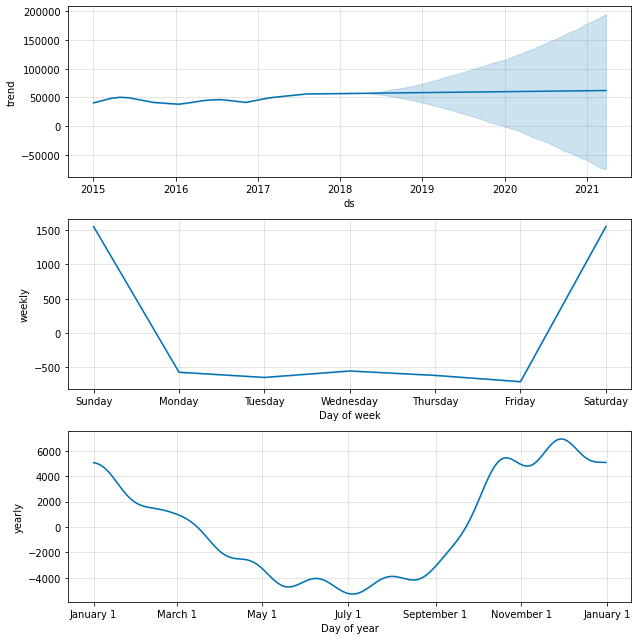

In [28]:
model_gm.plot_components(gm_forecast)

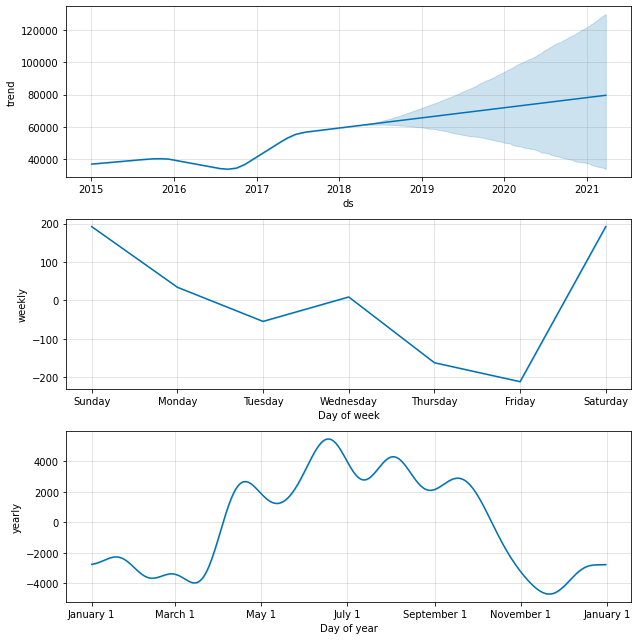

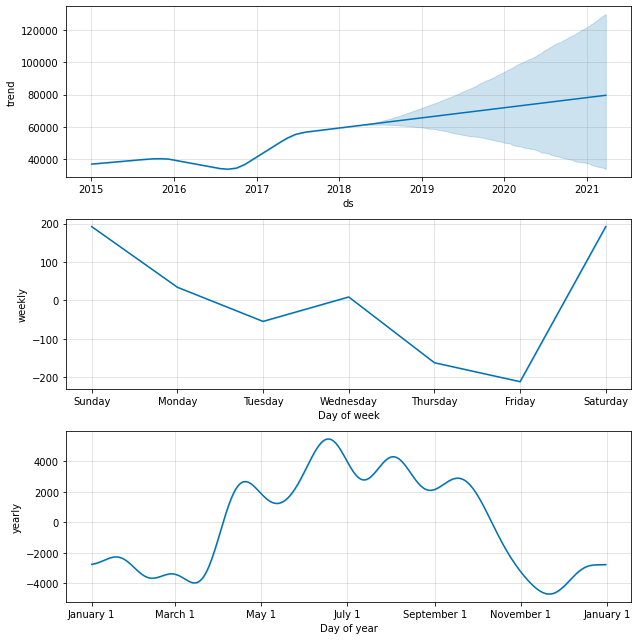

In [29]:
model_t.plot_components(tesla_forecast)

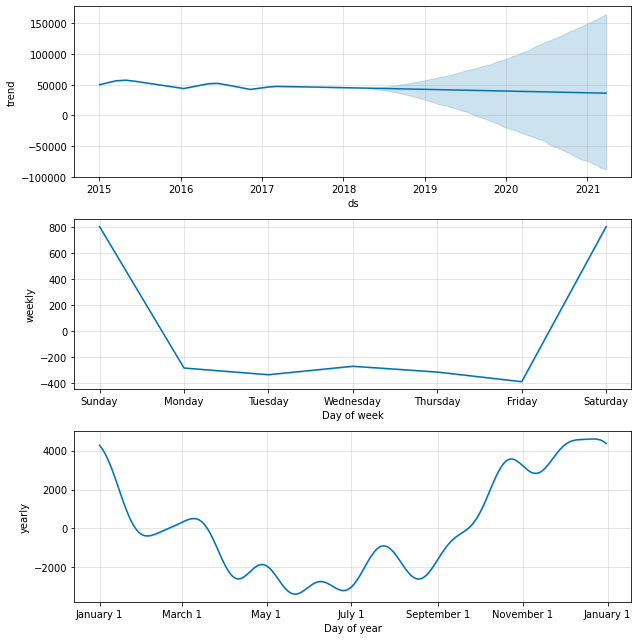

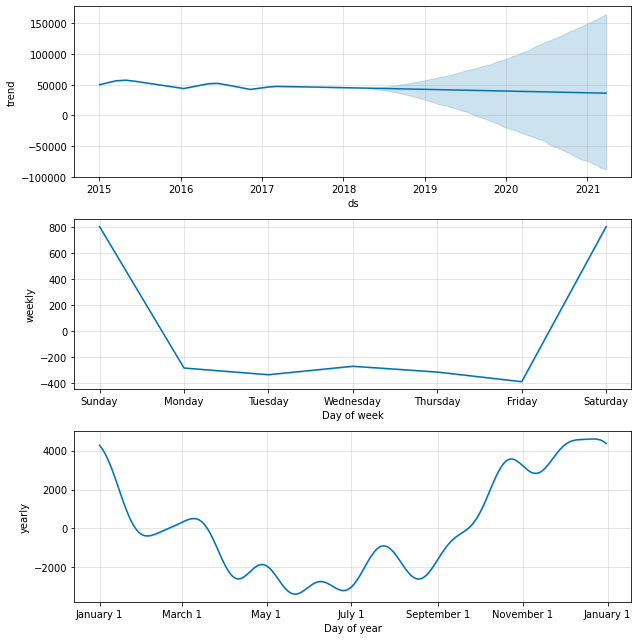

In [30]:
model_f.plot_components(ford_forecast)

In [31]:
gm_names=['gm_%s' % column for column in gm_forecast.columns]
tesla_names=["tesla_%s" % column for column in tesla_forecast.columns]
ford_names=["ford_%s" % column for column in ford_forecast.columns]

In [32]:
gm_merge_m=gm_forecast.copy()
tesla_merge_n=tesla_forecast.copy()
ford_merge=ford_forecast.copy()

In [33]:
gm_merge_m.columns=gm_names
tesla_merge_n.columns=tesla_names
ford_merge.columns=ford_names

In [35]:
pred_s=pd.merge(gm_merge_m,tesla_merge_n,how="inner",left_on="gm_ds",right_on="tesla_ds")

In [36]:
pred_s=pd.merge(pred_s,ford_merge,how="inner",left_on="gm_ds",right_on="ford_ds")

In [38]:
pred_s=pred_s.rename(columns={"gm_ds":"Date"}).drop("tesla_ds",axis=1)

In [39]:
pred_s=pred_s.drop("ford_ds",axis=1)

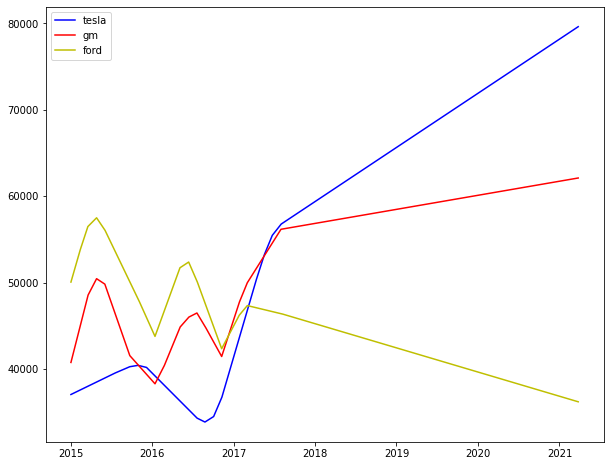

In [41]:
plt.figure(figsize=(10,8))
plt.plot(pred_s['Date'],pred_s['tesla_trend'],'b-',label="tesla")
plt.plot(pred_s['Date'],pred_s['gm_trend'],'r-',label='gm')
plt.plot(pred_s['Date'],pred_s['ford_trend'],'y-',label='ford')
plt.legend()
plt.show()